<a href="https://colab.research.google.com/github/hiydavid/time-series/blob/main/notebooks/ts_generation_with_simulators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Generation with Simulators

---

Facebook's new kaTS library provides simulators to create artificial time series. In this notebook I demonstrate how they are created.
1. Simulating artitificial time series with ARIMA model
2. Simulating artitificial time series with trend shifts
2. Simulating artitificial time series with level shifts

---
## Load Libraries

In [ ]:
# install facebook kats
!pip install kats

In [84]:
# load basic libraries
import numpy as np
import pandas as pd
import pprint
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from kats.consts import TimeSeriesData
from statsmodels.tsa.seasonal import STL
from kats.utils.simulator import Simulator
from sklearn.preprocessing import StandardScaler
from kats.tsfeatures.tsfeatures import TsFeatures

import warnings
warnings.simplefilter(action='ignore')

---
## Generate Time Series

In [85]:
# initiate 90 days of data at random
sim = Simulator(
    n = 90, 
    freq = "D", 
    start = "2021-01-01"
    )

random_seed = 100

In [92]:
# function to display 10 time series
def display_generated_ts(input_list):
    
    # chart location
    chart_loc = [(0,0), (0,1), (1,0), (1,1), (2,0), 
                 (2,1), (3,0), (3,1), (4,0), (4,1)]
    
    # construct a 5x2 plot of plots
    fig, axs = plt.subplots(
        5, 2, figsize = (20, 20), sharex = True, sharey = True)
    
    # display all 10
    for a, b in zip(range(len(input_list)), chart_loc):
        df = input_list[a].to_dataframe()
        axs[b].plot(df['time'], df['value'], color = 'C0')
        axs[b].set_title(f"Time Series #{a}")
        axs[b].set_xlabel("Time")
        axs[b].set_ylabel("Value")
    plt.show()

### ARIMA Generated

In [93]:
# generate 10 TimeSeriesData with arima_sim
np.random.seed(random_seed) # setting numpy seed
arima_sim_list = [
    sim.arima_sim(
        ar = [0.1, 0.05], 
        ma = [0.04, 0.1], 
        d = 1
    ) for _ in range(10)
]

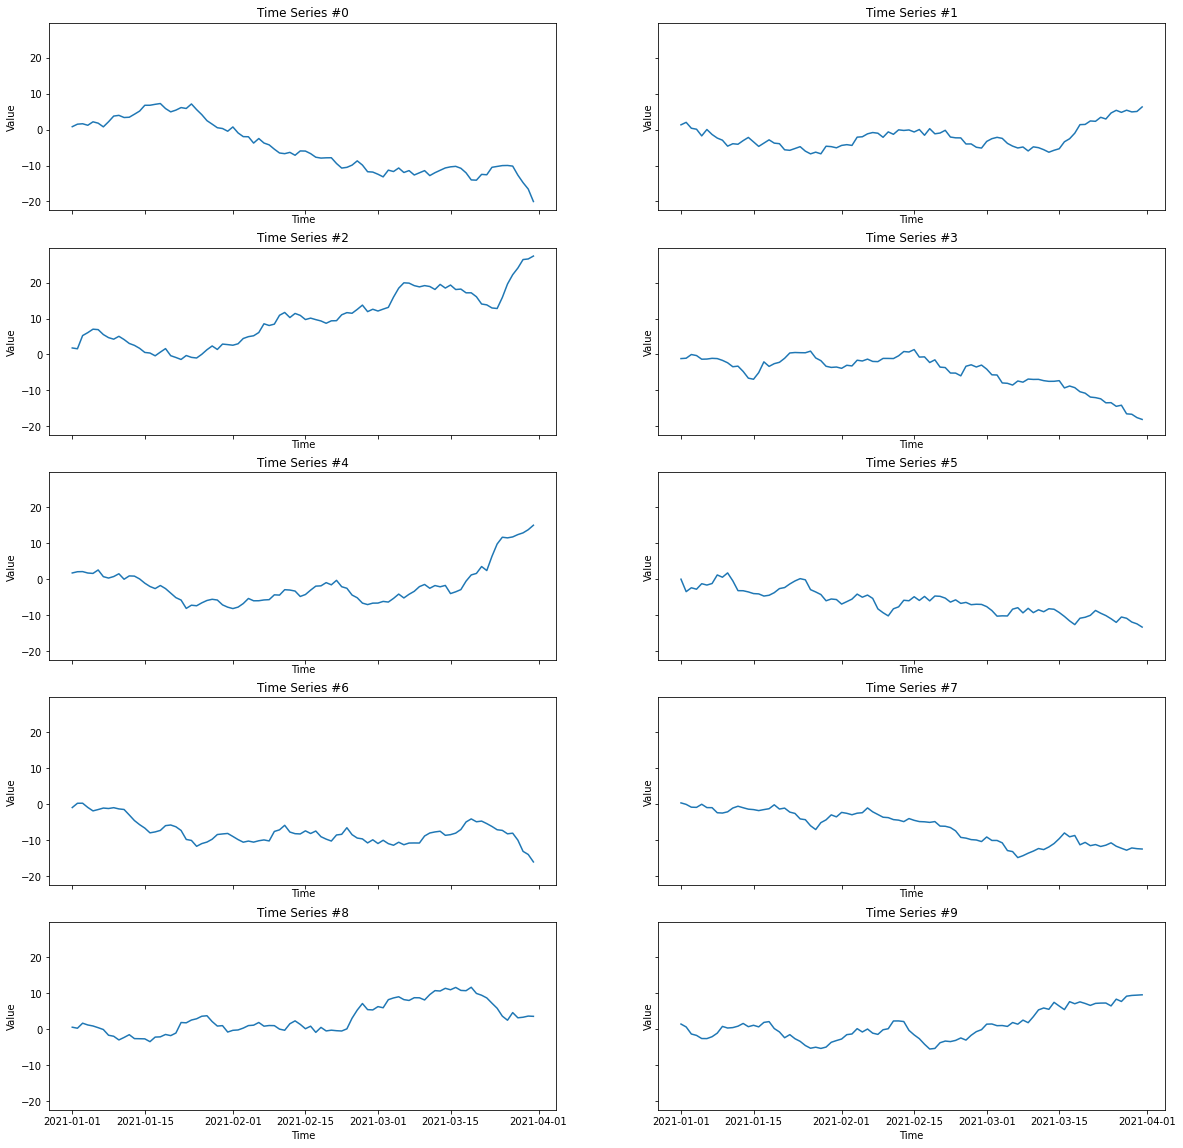

In [94]:
# display time series
display_generated_ts(input_list = arima_sim_list)

### Trend Generated

In [95]:
# generate 10 TimeSeriesData with trend_shift_sim
trend_sim_list = [
    sim.trend_shift_sim(
        cp_arr = [30, 60, 75],
        trend_arr = [3, 15, 2, 8],
        intercept = 30,
        noise = 50,
        seasonal_period = 7,
        seasonal_magnitude = np.random.uniform(10, 100),
        random_seed = random_seed
    ) for _ in range(10)
]

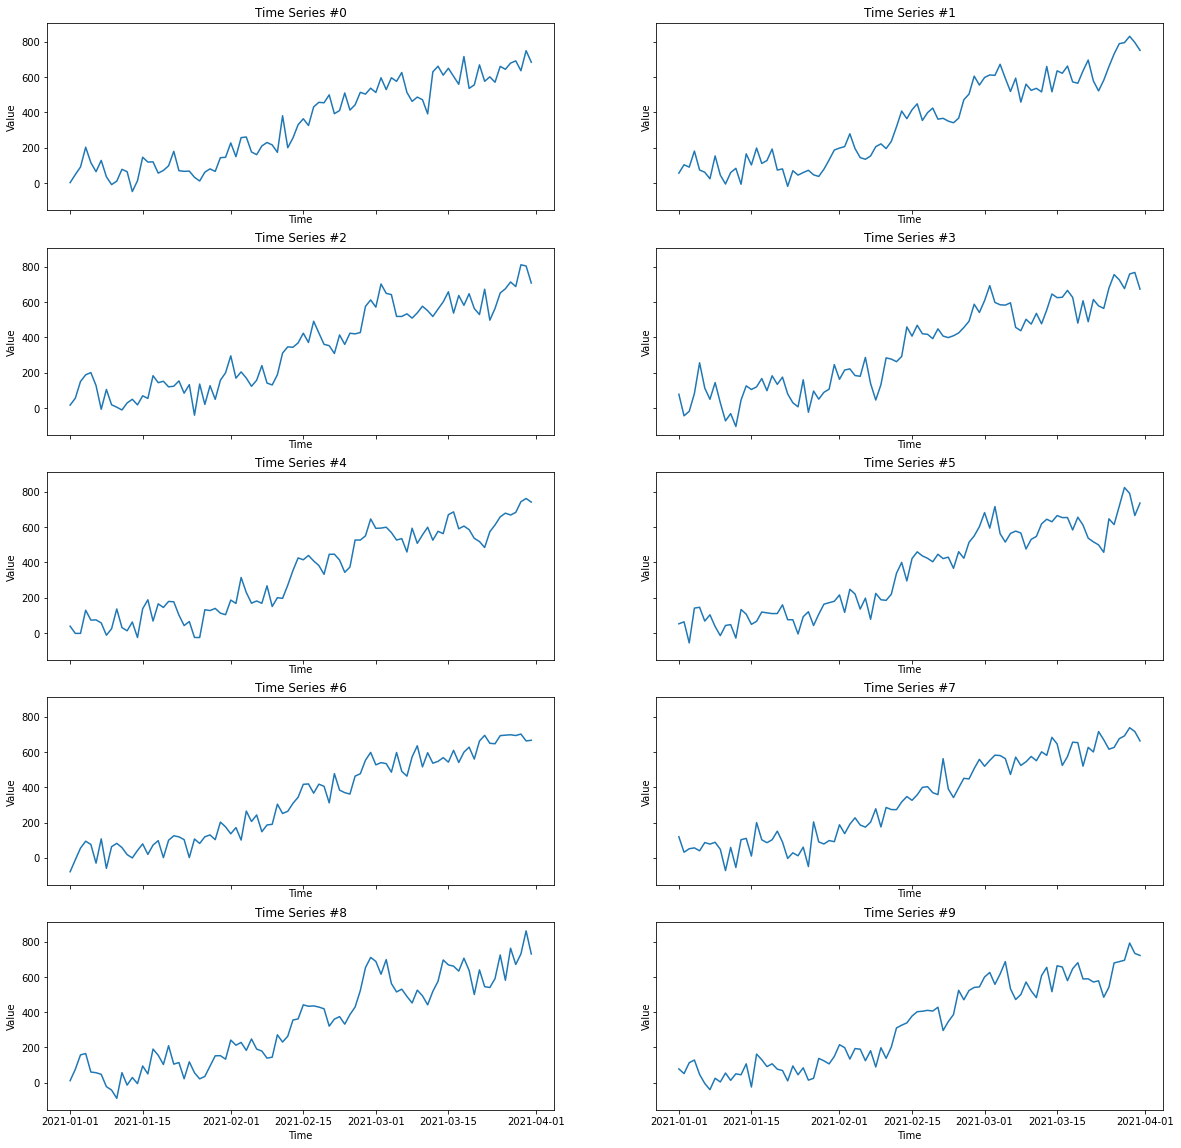

In [96]:
# display time series
display_generated_ts(input_list = trend_sim_list)

### Level Generated

In [99]:
# generate 10 TimeSeriesData with level shifts
level_shift_list = [
    sim.level_shift_sim(
        cp_arr = [30, 60, 75],
        level_arr = [1.35, 1.05, 1.35, 1.2],
        noise = 0.05,
        seasonal_period = 7,
        seasonal_magnitude = np.random.uniform(0.1, 1.0),
        random_seed = random_seed
    ) for _ in range(10)
]

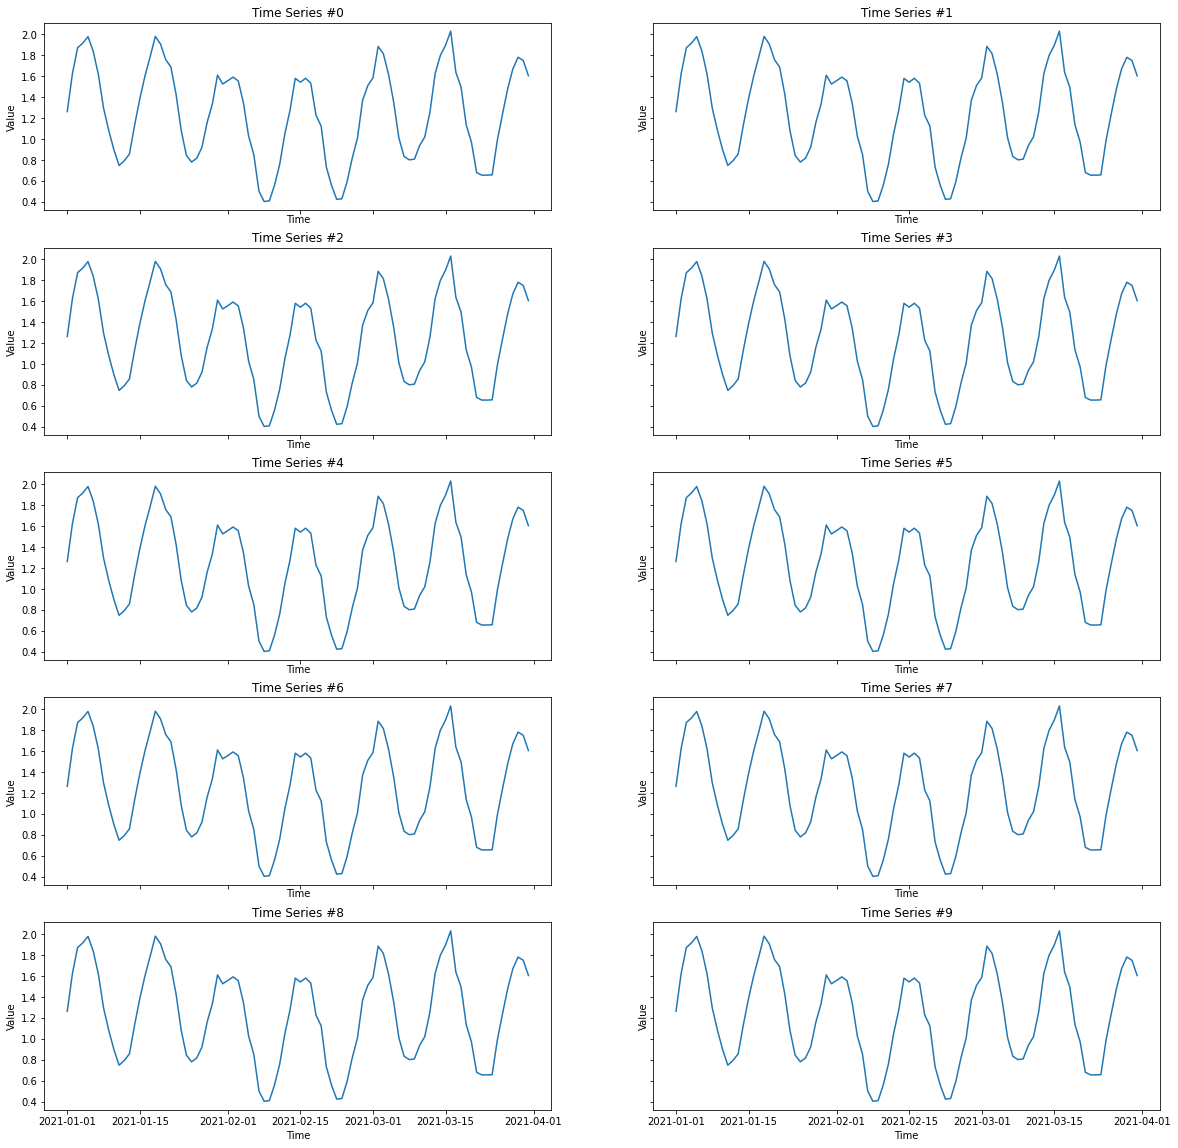

In [100]:
# display time series
display_generated_ts(input_list = level_shift_list)